# Demonstration of some python, julia, and notebook programing
Scott Henderson
Julia User Group Meeting 8/2015
 
#### What is Jupyter?
It is a web-notebook interface connected to an interactive coding terminal. Originally exclusively for Python, the language agnostic features have been broken out so it can be used with many other programing languages (R, Julia). The main idea is to have a 'computable document' where documentation, code, figures, are all in one place and can easily be modified by another person. https://jupyter.org/ 

import python packages (math and plotting methods)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Run terminal (bash/csh commands):

In [4]:
!ls

demo.ipynb  jupyterdemo.yml  README.md


In [5]:
!pwd

/home/txks/github/jupyterdemo


mix bash and python easily

In [16]:
myhome = '/home/txks'
!ls {myhome}

Desktop    github    projects  SeisSpace	       user.env2015
Documents  Landmark  run       update_cntlm_conf.bash  user.env.bash
Downloads  local     scripts   user.env		       user.env.csh.bak


In [22]:
files = !ls {myhome} #capture output as python list variable
[x for x in files if x.startswith('user')] #operate on list with python

['user.env', 'user.env2015', 'user.env.bash', 'user.env.csh.bak']

Lots of special commands that aren't standard python:
https://ipython.org/ipython-doc/dev/interactive/reference.html 
https://ipython.org/ipython-doc/3/interactive/magics.html (these start with % or %%)

In [28]:
myfiles = %sx ls {myhome}
print(myfiles.n) #%sx formats as object instead of a list so muyfiles has attributes (e.g. myfiles.n)

Desktop
Documents
Downloads
github
Landmark
local
projects
run
scripts
SeisSpace
update_cntlm_conf.bash
user.env
user.env2015
user.env.bash
user.env.csh.bak


### Speeding up numerical python functions

Example from here:
http://numba.pydata.org/numba-doc/0.20.0/index.html

First benchmark with standard python functions (calculating and plotting mandelbrot set)
$$c = \sqrt{a^2 + b^2}$$

In [39]:
# Standard functions
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x,y)
    z = 0j
    for i in range(max_iters):
        z = z*z + c
        if z.real * z.real + z.imag * z.imag >= 4:
            return 255 * i // max_iters

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [40]:
%%timeit
image = np.zeros((700, 1400), dtype=np.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

1 loops, best of 3: 5.75 s per loop


Note that using %%timeit doesn't output variables, so need to re-run the code one to regenerate the image for plotting

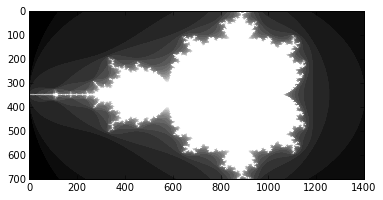

In [30]:
image = np.zeros((700, 1400), dtype=np.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
plt.imshow(image)
plt.gray()
plt.show()

## Optimized Versions (C-code)

Note only difference is adding @jit 'decorator'

In [8]:
from numba import jit

In [36]:
@jit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x,y)
    z = 0j
    for i in range(max_iters):
        z = z*z + c
        if z.real * z.real + z.imag * z.imag >= 4:
            return 255 * i // max_iters

    return 255

@jit(nopython=True)
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

In [38]:
%%timeit
image = np.zeros((700, 1400), dtype=np.uint8)
image = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)

10 loops, best of 3: 48.8 ms per loop


In [48]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/b/b1/Julia_set_%28ice%29.png')

So what about running a julia command?

Theoretically you can do that:
https://github.com/JuliaLang/IJulia.jl 

But it's currently a bit messy and being worked on...
http://stackoverflow.com/questions/24091373/best-way-to-run-julia-code-in-an-ipython-notebook-or-python-code-in-an-ijulia-n

In [50]:
%%julia

println("Hello from Julia!\n")
[1:10]

ERROR: Cell magic `%%julia` not found.
